In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

# Numbers

A number is a mathematical concept -- an abstract idea.  


> God made the integers, all else is the work of man.

-- Leopold Kronecker (1823 - 1891)


In a computer we assign __bit patterns__ to correspond to certain numbers.   

We say the bit pattern is the number's _representation._

For example the number '3.14' might have the representation '01000000010010001111010111000011'.

For reasons of efficiency, we use a fixed number of bits for these representations.   In most computers nowadays we use __64 bits__ to represent a number.   

# Integers

For the most part, using integers is not complicated.    

Integer representation is essentially the same as binary numerals.  

For example, in a 64-bit computer, the representation of the concept of 'seven' would be '0..0111' (with 61 zeros in the front).

There is a size limit on the largest value that can be stored as an integer, but it's so big we don't need to concern ourselves with it in this course.

So for our purposes, an integer can be stored exactly.

In other words, there is an 1-1 correspondence between every representation and the corresponding integer.

So, what happens when we compute with integers?

For (reasonably sized) integers, computation is __exact__ .... as long as it only involves __addition, subtraction, and multiplication.__  

In other words, there are no errors introduced when adding, subtracting or multiplying integers.    

However, it is a different story when we come to division, because the integers are not closed under division.

For example, 2/3 is not an integer.   ... It is, however, a __real__ number.

# Real Numbers and Floating-Point Representations

Representing a real number in a computer is a __much__ more complicated matter.   

In fact, for many decades after electronic computers were developed, there was no accepted "best" way to do this!   

Eventually (in the 1980s) a widely accepted standard emerged, called IEEE-754.  This is what almost all computers now use.

The style of representation used is called __floating point.__

Conceptually, it is similar to "scientific notation."

$$123456 = \underbrace{1.23456}_{significand}\times {\underbrace{10}_{base}}^{\overbrace{5}^{exponent}}$$

Except that it is encoded in binary:

$$17 = \underbrace{1.0001}_{significand}\times {\underbrace{2}_{base}}^{\overbrace{4}^{exponent}}$$

The sign, significand, and exponent are all contained within the 64 bits.

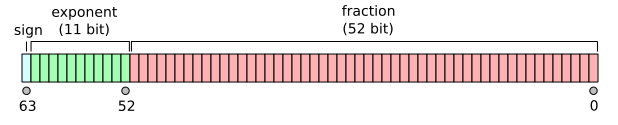

In [3]:
sl.hide_code_in_slideshow()
display(Image("images/IEEE_754_Double_Floating_Point_Format.png", width=450))

<font size='1'> By Codekaizen (Own work) [<a href="http://www.gnu.org/copyleft/fdl.html">GFDL</a> or <a href="http://creativecommons.org/licenses/by-sa/4.0-3.0-2.5-2.0-1.0">CC BY-SA 4.0-3.0-2.5-2.0-1.0</a>], <a href="https://commons.wikimedia.org/wiki/File%3AIEEE_754_Double_Floating_Point_Format.svg">via Wikimedia Commons</a></font>

Because only a fixed number of bits are used, __most real numbers cannot be represented exactly in a computer.__

Another way of saying this is that, usually, a floating point number is an approximation of some particular real number.

Generally when we try to store a real number in a computer, __what we wind up storing is the closest floating point number that the computer can represent.__

##Rules for Working with Floating Point

The way to think about working with floating point (in fact, how the hardware actually does it) is:

1. Represent each input as the __nearest__ representable floating point number.
2. Compute the result exactly from the floating point representations.
3. Return the __nearest__ representable floating point number to the result.

What does "__nearest__" mean?   Long story short, it means "round to the nearest representable value."

Let's say we have a particular real number $r$ and we represent it as a floating point value $f$.   

Then $r = f + \epsilon$ where $\epsilon$ is the amount that $r$ was rounded when represented as $f$.

How big can epsilon be?  Let's say $f$ is

$$f = \underbrace{1.010...01}_{53~bits}\times 2^n$$

Then $|\epsilon|$ must be smaller than $$|\epsilon| < \underbrace{0.000...01}_{53~bits}\times 2^n$$.

So as a _relative error_, 

$$ \mbox{relative error} = \frac{|\epsilon|}{f} < \frac{{0.000...01}\times 2^n}{\underbrace{1.000...00}_{53~bits}\times 2^n} = 2^{-52} \approx 10^{-16}$$

Problems arise when we work with floating point numbers and confuse them with real numbers, thereby forgetting that most of the time we are not storing the real number exactly, but only a floating point number that is close to it.

Let's look at some examples.  First:

In [4]:
# ((1/8)*8)-1
a = 1/8
b = 8
c = 1
(a*b)-c

0.0

It turns out that 1/8, 8, and 1 can all be stored exactly in IEEE-754 floating point format.

So, we are 
* storing the inputs exactly (1/8, 8 and 1)
* computing the results exactly (by definition of IEEE-754), yielding $(1/8) * 8 = 1$
* and representing the result exactly (zero)

OK, here is another example:

In [5]:
# ((1/7)*7)-1
a = 1/7
b = 7
c = 1
a * b - c

0.0

Here the situation is different. 

1/7 can __not__ be stored exactly in IEEE-754 floating point format.

In binary, 1/7 is $0.001\overline{001}$, an infinitely repeating pattern that clearly cannot be represented in a finite sequence of bits.

Nonetheless, the computation $(1/7)*7$ still yields exactly 1.0.

Why? Because the rounding of $0.001\overline{001}$ to its closest floating point representation, when multiplied by 7, yields a value whose closest floating point representation is 1.0.

Now, let's do something that seems very similar:

In [6]:
# ((1/70)*7)-0.1
a = 1/70
b = 7
c = 0.1
a * b - c

-1.3877787807814457e-17

In this case, both 1/70 and 0.1 __cannot__ be stored exactly.    

More importantly, the process of rounding 1/70 to its closest floating point representation, then multiplying by 7, yields a number whose closest floating point representation is __not__ 0.1

However, that floating point representation is very __close__ to 0.1.   

Let's look at the difference: -1.3877787807814457e-17.  

This is about $-1 \cdot 10^{-17}$.

In other words, -0.0000000000000001

Compared to 0.1, this is a very small number.  The relative error abs(-0.0000000000000001 / 0.1) is about $10^{-16}.$

This suggests that when a floating point calculation is not exact, the error (in a relative sense) is usually very small.

Notice also that in our example the size of the relative error is about $10^{-16}$.   

Recall that the significand in IEEE-754 uses 52 bits and that $2^{-52} \approx 10^{-16}$.

One way of thinking about this is that you __only have about 16 digits of accuracy__ in a floating point number.

## Special Values

There are three kinds of special values defined by IEEE-754:
1.  NaN, which means "Not a Number" 
2.  Infinity -- both positive and negative
3.  Zero -- both positive and negative.

__NaN__ and __Inf__ behave about as you'd expect.  If you get one of these values in a computation you should be able to reason about how it happened.   Note that these are values, and can be assigned to variables.

In [7]:
np.sqrt(-1)

nan

In [8]:
var = np.log(0)
var

-inf

In [9]:
1/var

-0.0

As far as we are concerned, there is no difference between positive and negative zero.   You can ignore the minus sign in front of a negative zero.

In [10]:
var = np.nan
var + 7

nan

In [11]:
var = np.inf
var + 7

inf

# Mathematical "Computation" and _Actual_ Computation

In a mathematical theorem, working with (idealized) numbers, it is always true that:

If $c = 1/a$, then $abc = b.$

In other words, $(ab)/a = b.$

Let's test whether this is always true in actual computation.

In [12]:
a = 7
b = 1/10
c = 1/a
a*c*b

0.1

In [13]:
b*c*a

0.09999999999999999

In [14]:
a*c*b == b*c*a

False

Here is another example:

In [15]:
0.1 + 0.1 + 0.1 

0.30000000000000004

In [16]:
3 * (0.1) - 0.3

5.551115123125783e-17

## Principle 1: Do not compare floating point numbers for equality

Two floating point computations that _should_ yield the same result mathematically, may not do so due to rouding error.

However, in general, if two numbers should be equal, the relative error of the difference in the floating point should be small.

So, instead of asking whether two floating numbers are equal, we should ask whether the relative error of their difference is small.

In [17]:
r1 = a * b * c
r2 = b * c * a
np.abs(r1-r2)/r1

1.3877787807814457e-16

In [18]:
np.finfo('float')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [19]:
print(r1 == r2)
print(np.abs(r1-r2)/r1 < np.finfo('float').resolution)

False
True


## Principle 2: Beware of ill-conditioned problems

An __ill-conditioned__ problem is one in which the outputs depend in a very sensitive manner on the inputs.  

That is, a small change in the inputs can yield a very large change in the outputs.

The simplest example is computing $1/(a-b)$.

In [20]:
print(r1)
r3 = r1 + 0.0001
print(1/(r1-r2))
print(1/(r3-r2))

0.1
7.205759403792794e+16
9999.999999998327


Because the inputs to your problem may not be exact, if the problem is ill-conditioned, the outputs may be wrong by a large amount.

## Principle 3: Relative error can be magnified during subtractions

Two numbers, each with small relative error, can yield a value with large relative error if subtracted.

Let's say we represent a = 1.2345 as 1.2345002 -- the relative error is 0.0000002.

Let's say we represent b = 1.234  as 1.2340001 -- the relative error is 0.0000001.

Now, subtract a - b: the result is .0005001.    

What is the relative error?  0.005001 - 0.005 / 0.005 = 0.0002  

The relative error of the result is 1000 times larger than the relative error of the inputs.

Here's an example in practice:

In [21]:
a = 1.23456789
b = 1.2345678
print(0.00000009)
print(a-b)
print(np.abs(a-b-0.00000009)/ 0.00000009)

9e-08
8.999999989711682e-08
1.14314640119e-09


We know the relative error in the inputs is on the order of $10^{-16}$, but the relative error of the output is on the order of $10^{-9}$ -- i.e., a million times larger.

A good summary that covers additional issues is at https://docs.python.org/2/tutorial/floatingpoint.html. 